In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os
import glob
import pandas as pd
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter
from scipy import integrate

%matplotlib inline


In [2]:
Badat = pd.read_csv('/Users/austinmcdonald/Desktop/data/Fluo4/8-18-16/fluo4-ba-test/Ba-8.csv',delimiter=",",names = ['wave','sig'],skiprows=33,skipfooter=1,engine='python')
Baback = pd.read_csv('/Users/austinmcdonald/Desktop/data/Fluo4/8-18-16/fluo4-ba-test/water.csv',delimiter=",",names = ['wave','sig'],skiprows=33,skipfooter=1,engine='python')
BadatN = pd.read_csv('/Users/austinmcdonald/Desktop/data/Fluo4/8-18-16/fluo4-ba-test/Ba-0.csv',delimiter=",",names = ['wave','sig'],skiprows=33,skipfooter=1,engine='python')

Cadat = pd.read_csv('/Users/austinmcdonald/Desktop/data/Fluo4/8-18-16/fluo4-ca-test/ca-10.csv',delimiter=",",names = ['wave','sig'],skiprows=33,skipfooter=1,engine='python')
Caback = pd.read_csv('/Users/austinmcdonald/Desktop/data/Fluo4/8-18-16/fluo4-ca-test/CCD-noise.csv',delimiter=",",names = ['wave','sig'],skiprows=33,skipfooter=1,engine='python')
CadatN = pd.read_csv('/Users/austinmcdonald/Desktop/data/Fluo4/8-18-16/fluo4-ca-test/ca-00.csv',delimiter=",",names = ['wave','sig'],skiprows=33,skipfooter=1,engine='python')

flu =  pd.read_csv('/Users/austinmcdonald/Desktop/data/fluorescin/8-16-16/FLUORESCIN-10.csv',delimiter=",",names = ['wave','sig'],skiprows=33,skipfooter=1,engine='python')
flubac = pd.read_csv('/Users/austinmcdonald/Desktop/data/fluorescin/8-16-16/CCD-noise.csv',delimiter=",",names = ['wave','sig'],skiprows=33,skipfooter=1,engine='python')
fluN =  pd.read_csv('/Users/austinmcdonald/Desktop/data/fluorescin/8-16-16/FLUORESCIN-0.csv',delimiter=",",names = ['wave','sig'],skiprows=33,skipfooter=1,engine='python')


In [3]:
# fluo3 datas

Badat3 = pd.read_csv('/Users/austinmcdonald/Desktop/data/Fluo3/8-23-16/ca/Ca-08-P1.1_t1200.csv',delimiter=",",names = ['wave','sig'],skiprows=33,skipfooter=1,engine='python')
Baback3 = pd.read_csv('/Users/austinmcdonald/Desktop/data/Fluo3/8-23-16/ba/water.csv',delimiter=",",names = ['wave','sig'],skiprows=33,skipfooter=1,engine='python')
Badat3N = pd.read_csv('/Users/austinmcdonald/Desktop/data/Fluo3/8-23-16/ca/Ca-00-P1.1_t1200.csv',delimiter=",",names = ['wave','sig'],skiprows=33,skipfooter=1,engine='python')

Cadat3 = pd.read_csv('/Users/austinmcdonald/Desktop/data/Fluo3/8-23-16/ca/Ca-08-P1.1_t1200.csv',delimiter=",",names = ['wave','sig'],skiprows=33,skipfooter=1,engine='python')
Caback3 = pd.read_csv('/Users/austinmcdonald/Desktop/data/Fluo3/8-23-16/ca/CCD-noise.csv',delimiter=",",names = ['wave','sig'],skiprows=33,skipfooter=1,engine='python')
Cadat3N = pd.read_csv('/Users/austinmcdonald/Desktop/data/Fluo3/8-23-16/ca/Ca-00-P1.1_t1200.csv',delimiter=",",names = ['wave','sig'],skiprows=33,skipfooter=1,engine='python')


In [4]:
timeB=4.5
timeC=0.48
timeF=0.46
timeB3=5
timeC3=1.2

In [5]:
Badat['BS']=Badat['sig']-Baback['sig']
BadatN['BS']=BadatN['sig']-Baback['sig']

Cadat['BS']=Cadat['sig']-Caback['sig']
CadatN['BS']=CadatN['sig']-Caback['sig']

flu['BS']=flu['sig']-flubac['sig']
fluN['BS']=fluN['sig']-flubac['sig']

Badat3['BS']=Badat3['sig']-Baback3['sig']
Badat3N['BS']=Badat3N['sig']-Baback3['sig']

Cadat3['BS']=Cadat3['sig']-Caback3['sig']
Cadat3N['BS']=Cadat3N['sig']-Caback3['sig']

In [6]:
ba3cut = Badat3[(Badat3['wave']>490) & (Badat3['wave']<700)]
Iba3 = integrate.trapz(ba3cut['BS'], ba3cut['wave'])

ca3cut = Cadat3[(Cadat3['wave']>490) & (Cadat3['wave']<700)]
Ica3 = integrate.trapz(ca3cut['BS'], ca3cut['wave'])

ba4cut = Badat[(Badat['wave']>490) & (Badat['wave']<700)]
Iba4 = integrate.trapz(ba4cut['BS'], ba4cut['wave'])

ca4cut = Cadat[(Cadat['wave']>490) & (Cadat['wave']<700)]
Ica4 = integrate.trapz(ca4cut['BS'], ca4cut['wave'])

flucut = flu[(flu['wave']>490) & (flu['wave']<700)]
Iflu = integrate.trapz(flucut['BS'], flucut['wave'])
print('flu =',Iflu/timeF)
print('ca4 =',Ica4/timeC)
print('ca3 =',Ica3/timeC3)
print('ba4 =',Iba4/timeB)
print('ba3 =',Iba3/timeB3)

flu = 93.1524868557
ca4 = 78.9144244218
ca3 = 33.6699952034
ba4 = 9.48685401249
ba3 = 7.8169386134


In [7]:
print('flu =',Iflu/timeF/(Iflu/timeF)*100)
print('ca4 =',Ica4/timeC/(Iflu/timeF)*100)
print('ca3 =',Ica3/timeC3/(Iflu/timeF)*100)
print('ba4 =',Iba4/timeB/(Iflu/timeF)*100)
print('ba3 =',Iba3/timeB3/(Iflu/timeF)*100)

flu = 100.0
ca4 = 84.7153168804
ca3 = 36.1450309486
ba4 = 10.1842198021
ba3 = 8.39155118371


In [ ]:
flu['BS']=flu['sig']-flubac['sig']
fluN['BS']=fluN['sig']-flubac['sig']

baccut = flu[(flu['wave']>490) & (flu['wave']<700)]
Iflu = integrate.trapz(flucut['BS'], flucut['wave'])

In [8]:
print('ca3 =',Ica3/timeC3/(Iflu/timeF)*100)
print('ba3 =',Iba3/timeB3/(Iflu/timeF)*100)

NameError: name 'nor' is not defined

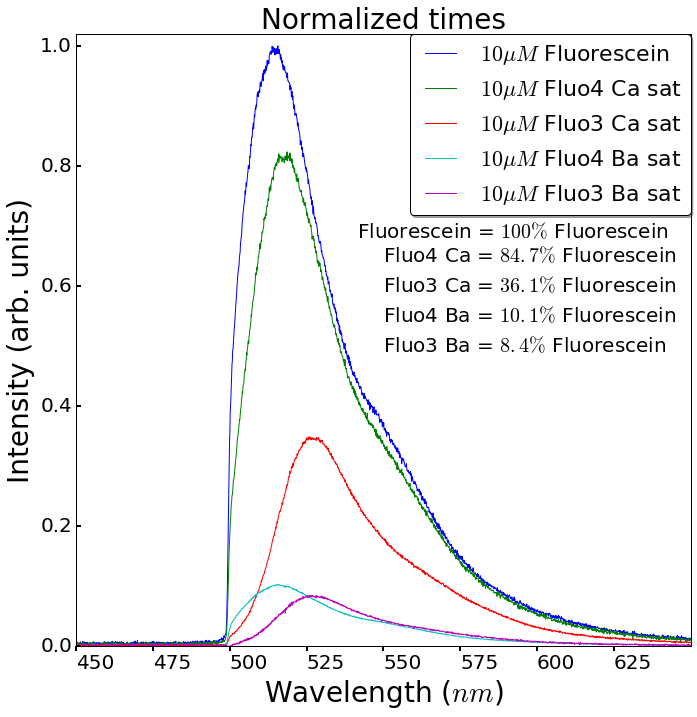

In [9]:
plt.figure(figsize=(10,10))
nor = max(flu['BS']/timeF)
plt.plot(flu['wave'],flu['BS']/timeF/nor,label=r'$10 \mu M$'+' Fluorescein')
plt.plot(Cadat['wave'],Cadat['BS']/timeC/nor,label=r'$10 \mu M$'+' Fluo4 Ca sat')
plt.plot(Cadat3['wave'],Cadat3['BS']/timeC3/nor,label=r'$10 \mu M$'+' Fluo3 Ca sat')
plt.plot(Badat['wave'],Badat['BS']/timeB/nor,label=r'$10 \mu M$'+' Fluo4 Ba sat')
plt.plot(Badat3['wave'],Badat3['BS']/timeB3/nor,label=r'$10 \mu M$'+' Fluo3 Ba sat')
plt.legend(bbox_to_anchor=(1,1), loc=1, borderaxespad=0.,fontsize=22,shadow=True, fancybox=True)

plt.text(541.3, .68, r'Fluorescein = $100 \%$ Fluorescein', fontsize=20)
plt.text(550, .64, r'Fluo4 Ca = $84.7 \%$ Fluorescein', fontsize=20)
plt.text(550, .59, r'Fluo3 Ca = $36.1 \%$ Fluorescein', fontsize=20)
plt.text(550, .54, r'Fluo4 Ba = $10.1 \%$ Fluorescein', fontsize=20)
plt.text(550, .49, r'Fluo3 Ba = $8.4 \%$ Fluorescein', fontsize=20)

plt.xlabel(r'Wavelength ($nm$)', fontsize=28)
plt.ylabel('Intensity (arb. units)', fontsize=28)
plt.title('Normalized times', fontsize=28)
plt.legend(bbox_to_anchor=(1,1), loc=1, borderaxespad=0.,fontsize=22,shadow=True, fancybox=True)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xticks([450,475,500,525,550,575,600,625],ha='left')
plt.tick_params(top="off",right='off')
plt.tick_params(axis='x', direction='out',width=2,length=5)
plt.tick_params(axis='y',width=2,length=5)

plt.tight_layout()
plt.xlim(450,650)
plt.ylim(0,1.02)
#plt.savefig('/Users/austinmcdonald/Desktop/Plots/paper8-16/waveforms-times.pdf')
plt.show()

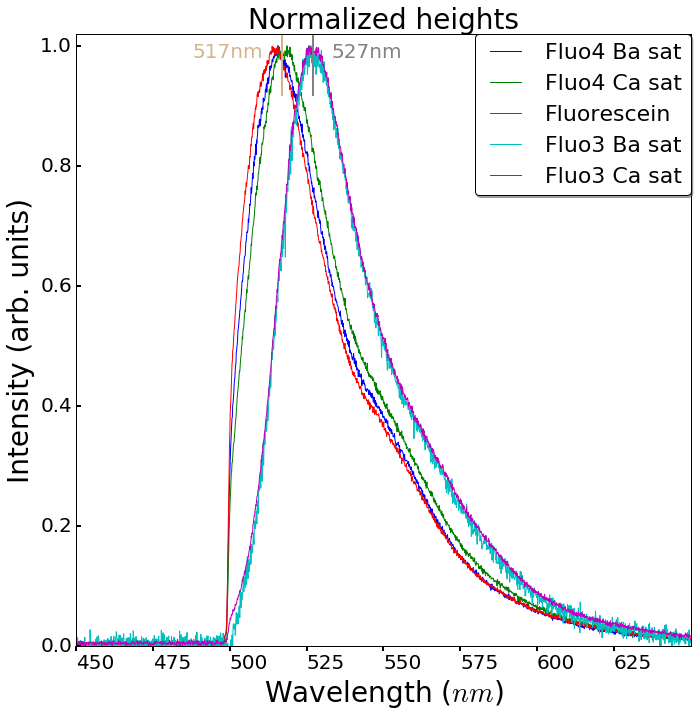

In [10]:
plt.figure(figsize=(10,10))

plt.plot(Badat['wave'],Badat['BS']/max(Badat['BS']),label='Fluo4 Ba sat')
plt.plot(Cadat['wave'],Cadat['BS']/max(Cadat['BS']),label= 'Fluo4 Ca sat')
plt.plot(flu['wave'],flu['BS']/max(flu['BS']),label=r'Fluorescein')
plt.plot(Badat3['wave'],Badat3['BS']/max(Badat3['BS']),label=r'Fluo3 Ba sat')
plt.plot(Cadat3['wave'],Cadat3['BS']/max(Cadat3['BS']),label=r'Fluo3 Ca sat')
plt.legend(bbox_to_anchor=(1,1), loc=1, borderaxespad=0.,fontsize=22,shadow=True, fancybox=True)


plt.text(488, .98, '517nm', fontsize=20,color= 'tan')
plt.text(533, .98, '527nm', fontsize=20,color= 'grey')
plt.axvline(x=527, ymin=0.9, ymax = 1, linewidth=2, color='grey')
plt.axvline(x=517, ymin=0.9, ymax = 1, linewidth=2, color='tan')

plt.xlabel(r'Wavelength ($nm$)', fontsize=28)
plt.ylabel('Intensity (arb. units)', fontsize=28)
plt.title('Normalized heights', fontsize=28)
plt.legend(bbox_to_anchor=(1,1), loc=1, borderaxespad=0.,fontsize=22,shadow=True, fancybox=True)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xticks([450,475,500,525,550,575,600,625],ha='left')
plt.tick_params(top="off",right='off')
plt.tick_params(axis='x', direction='out',width=2,length=5)
plt.tick_params(axis='y',width=2,length=5)

plt.tight_layout()
plt.xlim(450,650)
plt.ylim(0,1.02)
#plt.savefig('/Users/austinmcdonald/Desktop/Plots/paper8-16/waveforms-heights.pdf')
plt.show()

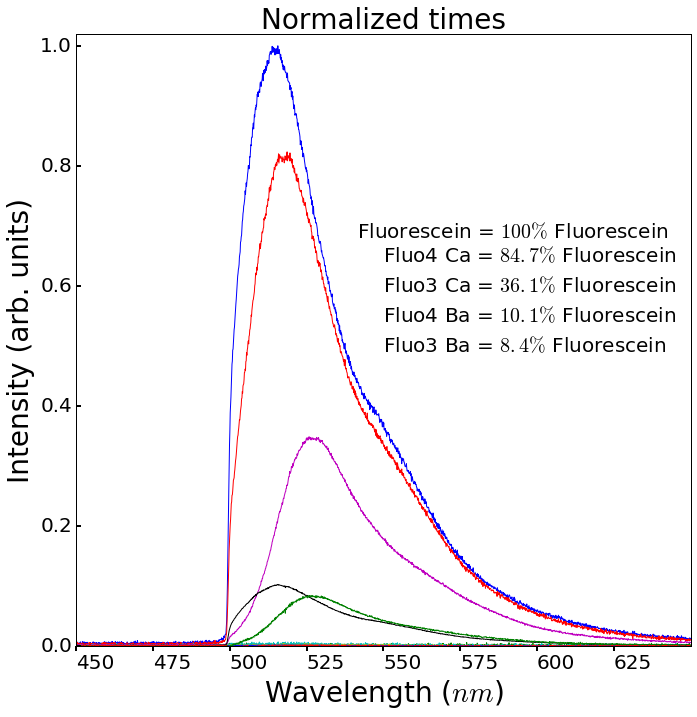

In [11]:
plt.figure(figsize=(10,10))
nor = max(flu['BS']/timeF)
plt.plot(flu['wave'],flu['BS']/timeF/nor,label=r'$10 \mu M$'+' Fluorescein')
plt.plot(fluN['wave'],fluN['BS']/timeF/nor,label= 'Fluorescein')

plt.plot(Cadat['wave'],Cadat['BS']/timeC/nor,label=r'$10 \mu M$'+' Fluo4 Ca sat')
plt.plot(CadatN['wave'],CadatN['BS']/timeC/nor,label=' Fluo4 Ca sat')

plt.plot(Cadat3['wave'],Cadat3['BS']/timeC3/nor,label=r'$10 \mu M$'+' Fluo3 Ca sat')
plt.plot(Cadat3N['wave'],Cadat3N['BS']/timeC3/nor,label=' Fluo3 Ca sat')

plt.plot(Badat['wave'],Badat['BS']/timeB/nor,label=r'$10 \mu M$'+' Fluo4 Ba sat')
plt.plot(BadatN['wave'],BadatN['BS']/timeB/nor,label=' Fluo4 Ba sat')

plt.plot(Badat3['wave'],Badat3['BS']/timeB3/nor,label=r'$10 \mu M$'+' Fluo3 Ba sat')
plt.plot(Badat3N['wave'],Badat3N['BS']/timeB3/nor,label=' Fluo3 Ba sat')

#plt.legend(bbox_to_anchor=(1,1), loc=1, borderaxespad=0.,fontsize=22,shadow=True, fancybox=True)

plt.text(541.3, .68, r'Fluorescein = $100 \%$ Fluorescein', fontsize=20)
plt.text(550, .64, r'Fluo4 Ca = $84.7 \%$ Fluorescein', fontsize=20)
plt.text(550, .59, r'Fluo3 Ca = $36.1 \%$ Fluorescein', fontsize=20)
plt.text(550, .54, r'Fluo4 Ba = $10.1 \%$ Fluorescein', fontsize=20)
plt.text(550, .49, r'Fluo3 Ba = $8.4 \%$ Fluorescein', fontsize=20)

plt.xlabel(r'Wavelength ($nm$)', fontsize=28)
plt.ylabel('Intensity (arb. units)', fontsize=28)
plt.title('Normalized times', fontsize=28)
#plt.legend(bbox_to_anchor=(1,1), loc=1, borderaxespad=0.,fontsize=22,shadow=True, fancybox=True)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xticks([450,475,500,525,550,575,600,625],ha='left')
plt.tick_params(top="off",right='off')
plt.tick_params(axis='x', direction='out',width=2,length=5)
plt.tick_params(axis='y',width=2,length=5)

plt.tight_layout()
plt.xlim(450,650)
plt.ylim(0,1.02)
#plt.savefig('/Users/austinmcdonald/Desktop/Plots/paper8-16/waveforms-times.pdf')
plt.show()

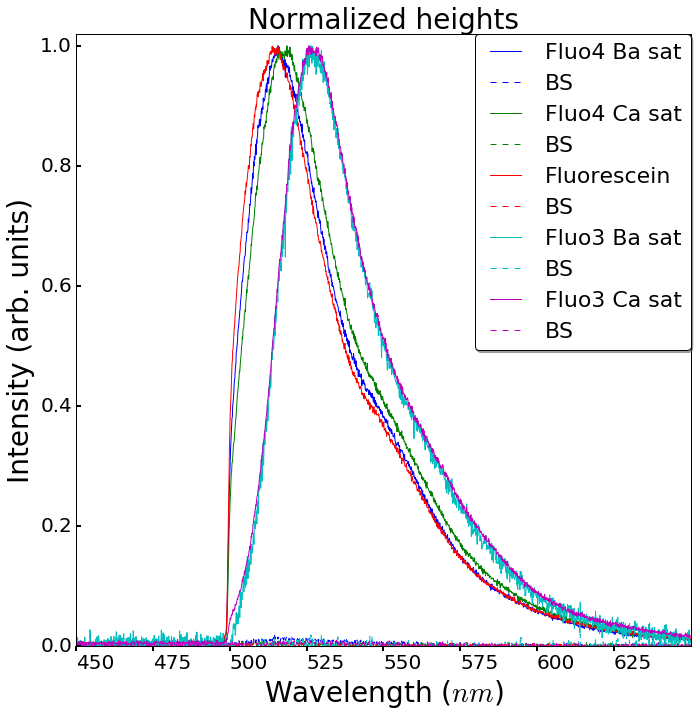

In [12]:
plt.figure(figsize=(10,10))

plt.plot(Badat['wave'],Badat['BS']/max(Badat['BS']),label='Fluo4 Ba sat',color='b')
plt.plot(BadatN['wave'],BadatN['BS']/max(Badat['BS']),color='b',linestyle='--')

plt.plot(Cadat['wave'],Cadat['BS']/max(Cadat['BS']),label= 'Fluo4 Ca sat',color='g')
plt.plot(CadatN['wave'],CadatN['BS']/max(Cadat['BS']),color='g',linestyle='--')

plt.plot(flu['wave'],flu['BS']/max(flu['BS']),label=r'Fluorescein',color='r')
plt.plot(fluN['wave'],fluN['BS']/max(flu['BS']),color='r',linestyle='--')

plt.plot(Badat3['wave'],Badat3['BS']/max(Badat3['BS']),label=r'Fluo3 Ba sat',color='c')
plt.plot(Badat3N['wave'],Badat3N['BS']/max(Badat3['BS']),color='c',linestyle='--')

plt.plot(Cadat3['wave'],Cadat3['BS']/max(Cadat3['BS']),label=r'Fluo3 Ca sat',color='m')
plt.plot(Cadat3N['wave'],Cadat3N['BS']/max(Cadat3['BS']),color='m',linestyle='--')

plt.legend(bbox_to_anchor=(1,1), loc=1, borderaxespad=0.,fontsize=22,shadow=True, fancybox=True)


#plt.text(585, .4, r'$\frac{F_{max}}{F_{min}} = 254.77$', fontsize=30)
plt.xlabel(r'Wavelength ($nm$)', fontsize=28)
plt.ylabel('Intensity (arb. units)', fontsize=28)
plt.title('Normalized heights', fontsize=28)
plt.legend(bbox_to_anchor=(1,1), loc=1, borderaxespad=0.,fontsize=22,shadow=True, fancybox=True)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xticks([450,475,500,525,550,575,600,625],ha='left')
plt.tick_params(top="off",right='off')
plt.tick_params(axis='x', direction='out',width=2,length=5)
plt.tick_params(axis='y',width=2,length=5)

plt.tight_layout()
plt.xlim(450,650)
plt.ylim(0,1.02)
#plt.savefig('/Users/austinmcdonald/Desktop/Plots/paper8-16/waveforms-heights.pdf')
plt.show()

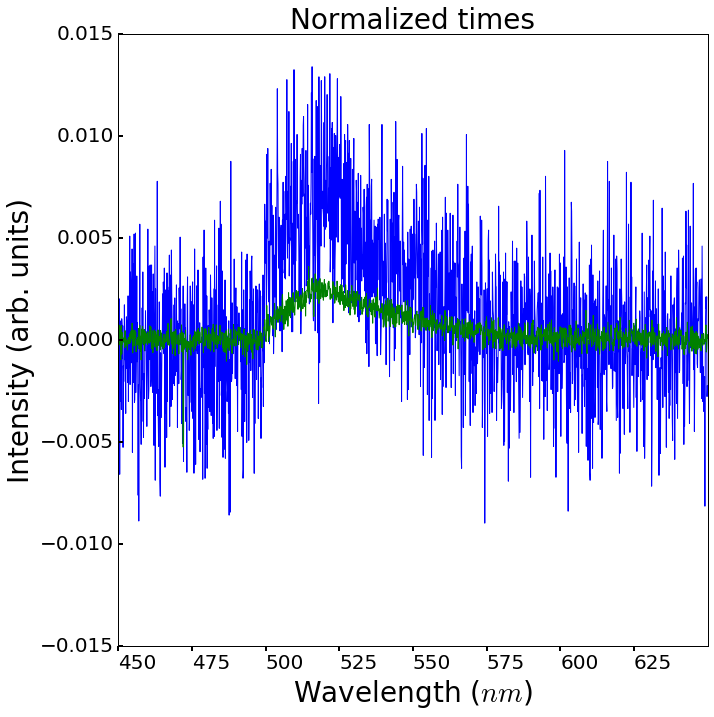

In [13]:
plt.figure(figsize=(10,10))
nor = max(flu['BS']/timeF)
#plt.plot(flu['wave'],flu['BS']/timeF/nor,label=r'$10 \mu M$'+' Fluorescein')
#plt.plot(fluN['wave'],fluN['BS']/timeF/nor,label= 'Fluorescein')

#plt.plot(Cadat['wave'],Cadat['BS']/timeC/nor,label=r'$10 \mu M$'+' Fluo4 Ca sat')
plt.plot(CadatN['wave'],CadatN['BS']/timeC,label=' Fluo4 Ca sat')

#plt.plot(Cadat3['wave'],Cadat3['BS']/timeC3/nor,label=r'$10 \mu M$'+' Fluo3 Ca sat')
#plt.plot(Cadat3N['wave'],Cadat3N['BS']/timeC3/nor,label=' Fluo3 Ca sat')

#plt.plot(Badat['wave'],Badat['BS']/timeB/nor,label=r'$10 \mu M$'+' Fluo4 Ba sat')
plt.plot(BadatN['wave'],BadatN['BS']/timeB,label=' Fluo4 Ba sat')

#plt.plot(Badat3['wave'],Badat3['BS']/timeB3/nor,label=r'$10 \mu M$'+' Fluo3 Ba sat')
#plt.plot(Badat3N['wave'],Badat3N['BS']/timeB3/nor,label=' Fluo3 Ba sat')

#plt.legend(bbox_to_anchor=(1,1), loc=1, borderaxespad=0.,fontsize=22,shadow=True, fancybox=True)

#plt.text(541.3, .68, r'Fluorescein = $100 \%$ Fluorescein', fontsize=20)
#plt.text(550, .64, r'Fluo4 Ca = $84.7 \%$ Fluorescein', fontsize=20)
#plt.text(550, .59, r'Fluo3 Ca = $36.1 \%$ Fluorescein', fontsize=20)
#plt.text(550, .54, r'Fluo4 Ba = $10.1 \%$ Fluorescein', fontsize=20)
#plt.text(550, .49, r'Fluo3 Ba = $8.4 \%$ Fluorescein', fontsize=20)

plt.xlabel(r'Wavelength ($nm$)', fontsize=28)
plt.ylabel('Intensity (arb. units)', fontsize=28)
plt.title('Normalized times', fontsize=28)
#plt.legend(bbox_to_anchor=(1,1), loc=1, borderaxespad=0.,fontsize=22,shadow=True, fancybox=True)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xticks([450,475,500,525,550,575,600,625],ha='left')
plt.tick_params(top="off",right='off')
plt.tick_params(axis='x', direction='out',width=2,length=5)
plt.tick_params(axis='y',width=2,length=5)

plt.tight_layout()
plt.xlim(450,650)
#plt.ylim(0,1.02)
#plt.savefig('/Users/austinmcdonald/Desktop/Plots/paper8-16/waveforms-times.pdf')
plt.show()

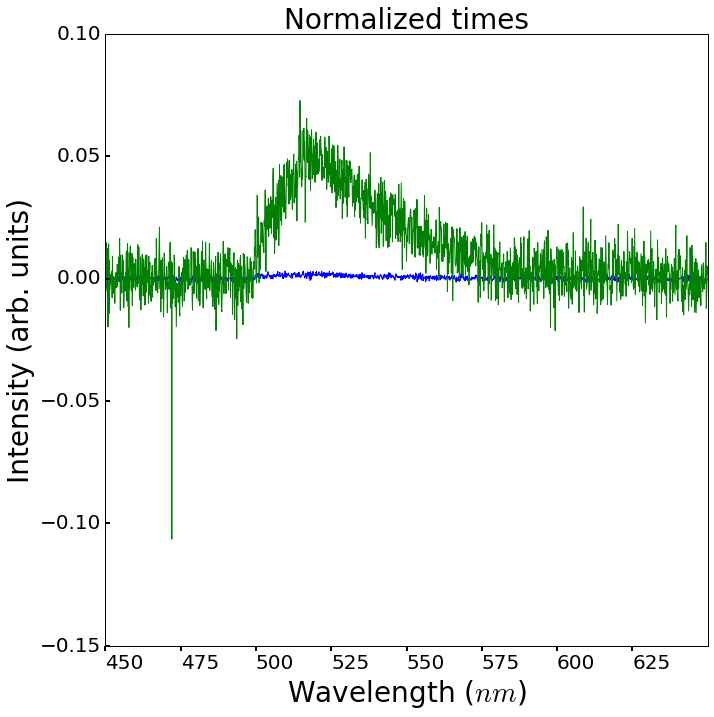

In [14]:
plt.figure(figsize=(10,10))
nor = max(flu['BS']/timeF)
#plt.plot(flu['wave'],flu['BS']/timeF/nor,label=r'$10 \mu M$'+' Fluorescein')
#plt.plot(fluN['wave'],fluN['BS']/timeF/nor,label= 'Fluorescein')

#plt.plot(Cadat['wave'],Cadat['BS']/timeC/nor,label=r'$10 \mu M$'+' Fluo4 Ca sat')
plt.plot(CadatN['wave'],CadatN['BS']*timeC,label=' Fluo4 Ca sat')

#plt.plot(Cadat3['wave'],Cadat3['BS']/timeC3/nor,label=r'$10 \mu M$'+' Fluo3 Ca sat')
#plt.plot(Cadat3N['wave'],Cadat3N['BS']/timeC3/nor,label=' Fluo3 Ca sat')

#plt.plot(Badat['wave'],Badat['BS']/timeB/nor,label=r'$10 \mu M$'+' Fluo4 Ba sat')
plt.plot(BadatN['wave'],BadatN['BS']*timeB,label=' Fluo4 Ba sat')

#plt.plot(Badat3['wave'],Badat3['BS']/timeB3/nor,label=r'$10 \mu M$'+' Fluo3 Ba sat')
#plt.plot(Badat3N['wave'],Badat3N['BS']/timeB3/nor,label=' Fluo3 Ba sat')

#plt.legend(bbox_to_anchor=(1,1), loc=1, borderaxespad=0.,fontsize=22,shadow=True, fancybox=True)

#plt.text(541.3, .68, r'Fluorescein = $100 \%$ Fluorescein', fontsize=20)
#plt.text(550, .64, r'Fluo4 Ca = $84.7 \%$ Fluorescein', fontsize=20)
#plt.text(550, .59, r'Fluo3 Ca = $36.1 \%$ Fluorescein', fontsize=20)
#plt.text(550, .54, r'Fluo4 Ba = $10.1 \%$ Fluorescein', fontsize=20)
#plt.text(550, .49, r'Fluo3 Ba = $8.4 \%$ Fluorescein', fontsize=20)

plt.xlabel(r'Wavelength ($nm$)', fontsize=28)
plt.ylabel('Intensity (arb. units)', fontsize=28)
plt.title('Normalized times', fontsize=28)
#plt.legend(bbox_to_anchor=(1,1), loc=1, borderaxespad=0.,fontsize=22,shadow=True, fancybox=True)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xticks([450,475,500,525,550,575,600,625],ha='left')
plt.tick_params(top="off",right='off')
plt.tick_params(axis='x', direction='out',width=2,length=5)
plt.tick_params(axis='y',width=2,length=5)

plt.tight_layout()
plt.xlim(450,650)
#plt.ylim(0,1.02)
#plt.savefig('/Users/austinmcdonald/Desktop/Plots/paper8-16/waveforms-times.pdf')
plt.show()